# SCENARIO 1: Linear Regression

## Predict Ocean Water Temperature (CalCOFI Dataset)

## Step-by-Step Implementation

### 1. Import Libraries

MIDHUN P 24BAD069

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

### 2. Load Dataset

In [105]:
bottle = pd.read_csv("CalCOFI/bottle.csv", low_memory=False)
cast = pd.read_csv("CalCOFI/cast.csv", low_memory=False)

# Select relevant columns from cast and rename
cast = cast[['Cst_Cnt', 'Lat_Dec', 'Lon_Dec']]
cast = cast.rename(columns={'Lat_Dec': 'Latitude', 'Lon_Dec': 'Longitude'})

# Merge bottle and cast data
df = pd.merge(bottle, cast, on='Cst_Cnt', how='left')

# Use a subset for faster processing if needed
df = df[:1000]

print(df.head())

   Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
0        1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0000A-3   
1        1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0008A-3   
2        1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0010A-7   
3        1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0019A-3   
4        1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0020A-7   

   Depthm  T_degC  Salnty  O2ml_L  STheta  O2Sat  ...  R_SAMP  DIC1  DIC2  \
0       0   10.50  33.440     NaN  25.649    NaN  ...     NaN   NaN   NaN   
1       8   10.46  33.440     NaN  25.656    NaN  ...     NaN   NaN   NaN   
2      10   10.46  33.437     NaN  25.654    NaN  ...     NaN   NaN   NaN   
3      19   10.45  33.420     NaN  25.643    NaN  ...     NaN   NaN   NaN   
4      20   10.45  33.421     NaN  25.643    NaN  ...     NaN   NaN   NaN   

   TA1  TA2  pH2  pH1  DIC Quality Comment   Latitude   Longitude  
0  NaN  NaN 

### 3. Select Features & Target

In [106]:
features = ['Depthm','Salnty','O2ml_L','Latitude','Longitude']
target = 'T_degC'

# Drop only rows where the target is missing
data = df[features + [target]].dropna(subset=[target])

# If O2ml_L is entirely null (common in subset), fill with 0 or drop it
if data['O2ml_L'].isnull().all():
    print("Warning: 'O2ml_L' is all NaN. Filling with 0.")
    data['O2ml_L'] = 0

print("Data shape after handling target NaNs:", data.shape)

Data shape after handling target NaNs: (998, 6)


### 4. Handle Missing Values

In [107]:
imputer = SimpleImputer(strategy='mean')
data[features] = imputer.fit_transform(data[features])

### 5. Feature Scaling

In [108]:
scaler = StandardScaler()
X = scaler.fit_transform(data[features])
y = data[target]

### 6. Train-Test Split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 7. Train Linear Regression

In [110]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### 8. Prediction

In [111]:
y_pred = model.predict(X_test)
print(y_pred)

[ 8.0161485  11.55795739  4.50358758  1.73128971 11.5673104   4.42681363
  3.7576601   4.2519787   0.85767807 12.0071595   6.08679854  5.63894048
 11.03074704  8.27825307 10.31987998 11.25564139 11.32130543  1.65416429
 11.67256775  4.89601373  8.0091201  11.87011025  9.01669293  6.4864041
  6.33474471  0.83162459  6.88625018 11.56676249  7.90072017 11.67039197
 10.82880847 11.56724313 11.26716115  5.7948608  11.49063033  8.40051574
 10.76439736  9.40831017  7.87361867 11.21477935  3.64579963 11.98479673
  4.90192727  6.79016196  9.053709    5.36942409  7.18104491 11.83755395
  7.78072946  9.54798494  6.13937585 11.87515012  6.93882921  5.43014719
 11.08851721  7.78856818  9.26509442  7.12721289  6.29106467 11.59812268
  3.24988183 12.20530366 11.6371425   6.86324879 11.59038706  2.7834347
 10.01600955  2.25330079  9.5889084  11.4163328  11.7403434   7.85556729
 11.9859958   4.01720686 12.13327633 11.60383908  8.78805716  9.09814028
 11.98204744  2.21502614 11.60003625 11.76193942 11.3

### 9. Evaluation

In [112]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MSE: 1.1242328313292305
RMSE: 1.0602984633249406
R² Score: 0.8948048029597465


## Visualization

### Actual vs Predicted

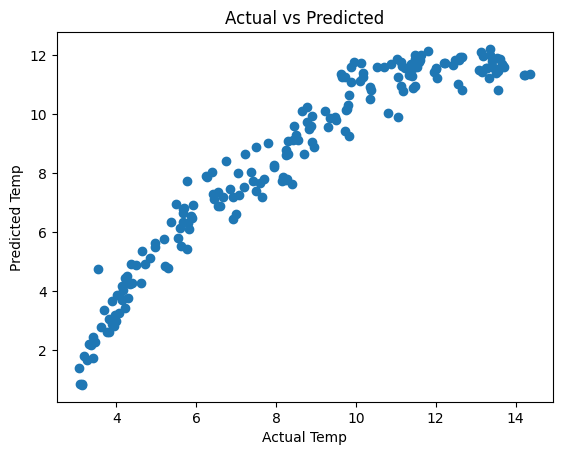

In [113]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Temp")
plt.ylabel("Predicted Temp")
plt.title("Actual vs Predicted")
plt.show()

### Residual Plot

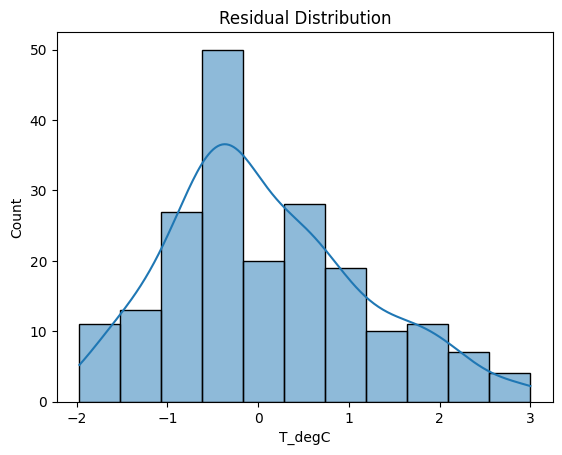

In [114]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

## Optimization

### Ridge

In [115]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


### Lasso

In [116]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.1
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'




# SCENARIO 2: Logistic Regression

## LIC Stock Movement Prediction


## Steps

### 1. Import Libraries

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

### 2. Load Dataset

In [118]:
df = pd.read_csv("LIC Stock Price Data/LICI - Daily data.csv")
print(df.columns)
print(df.head())

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')
                                                Date    Open    High     Low  \
0  Tue May 17 2022 00:00:00 GMT+0530 (India Stand...  872.00  918.95  860.00   
1  Wed May 18 2022 00:00:00 GMT+0530 (India Stand...  885.55  891.00  874.10   
2  Thu May 19 2022 00:00:00 GMT+0530 (India Stand...  867.00  867.00  838.00   
3  Fri May 20 2022 00:00:00 GMT+0530 (India Stand...  848.55  856.80  825.00   
4  Mon May 23 2022 00:00:00 GMT+0530 (India Stand...  826.15  852.70  803.65   

    Close  
0  875.25  
1  876.35  
2  840.85  
3  826.15  
4  816.85  


### 3. Create Target Variable

In [119]:
df['Price_Movement'] = (df['Close'] > df['Open']).astype(int)

### 4. Select Features

In [120]:
# Feature Engineering: Create meaningful features from raw prices
df['High_Open'] = df['High'] - df['Open']
df['Open_Low'] = df['Open'] - df['Low']
df['High_Low'] = df['High'] - df['Low']

features = ['Open', 'High', 'Low', 'High_Open', 'Open_Low', 'High_Low']
X = df[features]
y = df['Price_Movement']

### 5. Handle Missing Values

In [121]:
X = X.fillna(X.mean())

### 6. Scaling

In [122]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 7. Train-Test Split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

### 8. Train Logistic Model

In [124]:
# Use class_weight='balanced' to handle the imbalance between class 0 and 1
log_model = LogisticRegression(class_weight='balanced', random_state=42)
log_model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

### 9. Prediction

In [125]:
y_pred = log_model.predict(X_test)
print(y_pred)

[0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1]


## Evaluation

In [126]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

Accuracy: 0.75
Precision: 0.4444444444444444
Recall: 1.0
F1: 0.6153846153846154


### Confusion Matrix

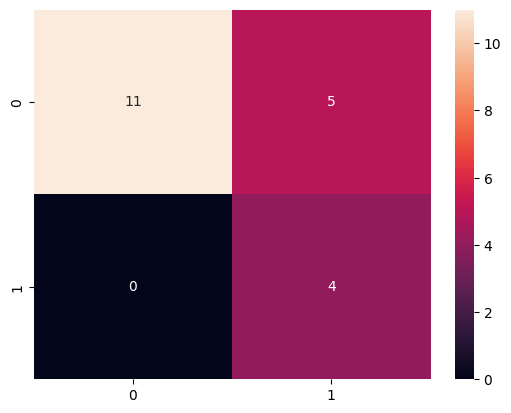

In [127]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### Feature Importance

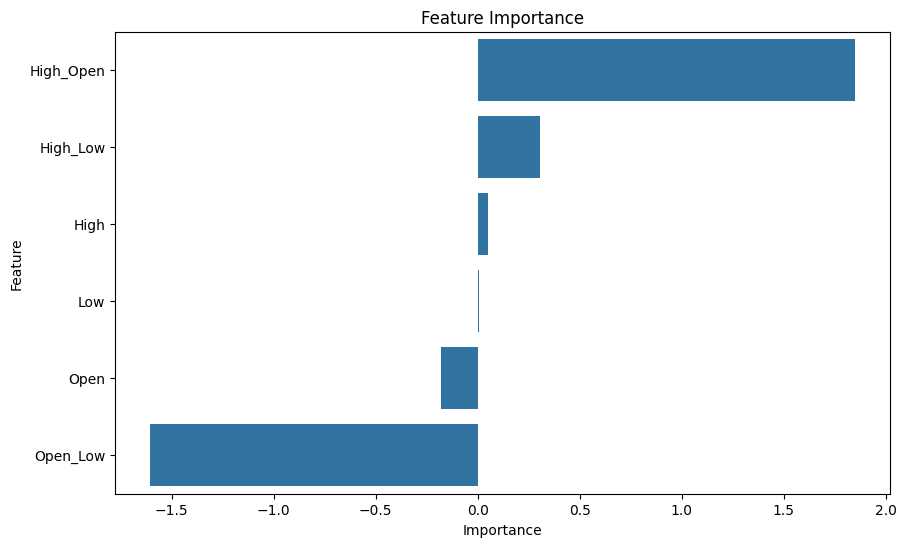

In [128]:
# Get feature importance (coefficients)
importance = pd.DataFrame({
    'Feature': features,
    'Importance': log_model.coef_[0]
})
importance = importance.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title('Feature Importance')
plt.show()

### ROC Curve

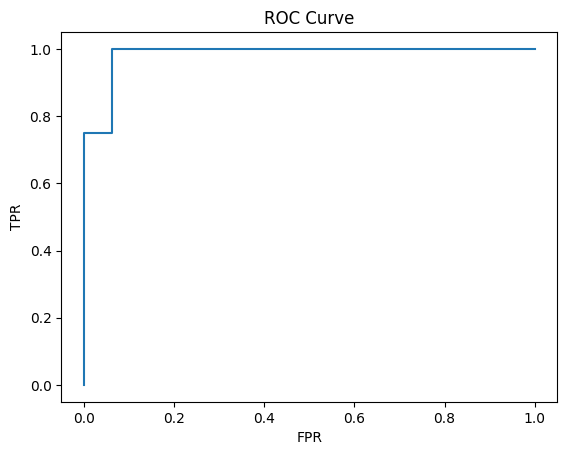

In [129]:
y_prob = log_model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

## Optimization

### Hyperparameter Tuning

In [130]:
from sklearn.model_selection import GridSearchCV

params = {
    'C':[0.01,0.1,1,10],
    'penalty':['l1','l2'],
    'solver':['liblinear']
}

# Use class_weight='balanced' here too
grid = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42), params)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)

Best Params: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


c:\Users\Asus\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2